In [1]:
library("dplyr")
library("ggplot2")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
ytdata <- read.csv(file="USvideos.csv", header=TRUE, sep=",")
#remove duplicates
ytdata <- ytdata[!duplicated(ytdata$video_id, fromLast = TRUE),]

In [3]:
tagsdata <- ytdata[c("views","tags")]

In [4]:
tagsdata$cleaned_tags <- NA
tagsdata$tags_count <- NA

In [8]:
#run this code to clean data
for(i in 1:length(tagsdata[,"tags"])){
    #converts tags into a character vector and returns the count
    tagsdata[i,"tags_count"] <- length(c(unlist(strsplit(as.character(tagsdata[i,"tags"]), "|", fixed = TRUE))))
    #cannot store a vector in a dataframe??? so have to keep as list
    tagsdata[i,"cleaned_tags"] <- list(strsplit(as.character(tagsdata[i,"tags"]), "|", fixed = TRUE))
}

In [46]:
#calculates average views for each bucket (# of tags in multiples of 5) of the histogram
avg_views <- c()
for(i in 0:13) {
   x <- i*5
   y <- x+5
   avg_views <- c(avg_views, mean(tagsdata[(tagsdata$tags_count > x & tagsdata$tags_count <= y), ]$views))
}

[1] 1944037.2 2386114.7 1670077.5 1904788.1 2445815.7 1807569.2 1603973.9
 [8] 1843224.7 1956360.0 1320350.8 2134494.0 2054576.1  382095.1  587842.0

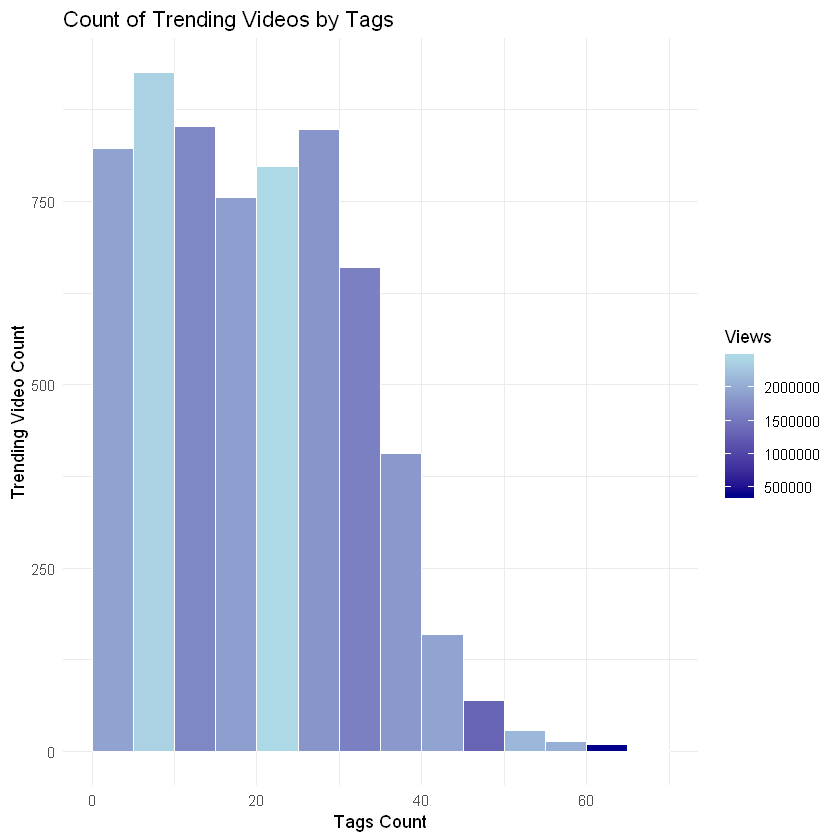

In [43]:
ggplot(tagsdata, aes(x=tags_count, fill=..viewlist..,)) + 
   geom_histogram(breaks=seq(0, 70, by=5), col="white") + 
   scale_fill_gradient("Views", low="dark blue", high="light blue") + 
   labs(title = "Count of Trending Videos by Tags", 
        x="Tags Count", 
        y = "Trending Video Count") + 
   theme_minimal()




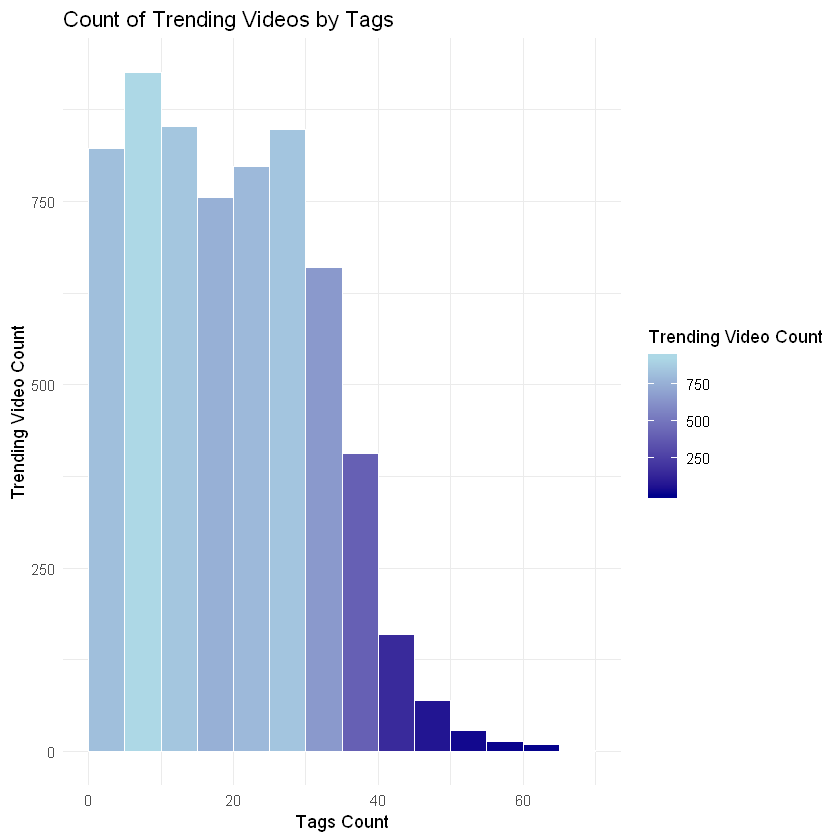

In [7]:
ggplot(tagsdata, aes(x=tags_count)) + 
   geom_histogram(breaks=seq(0, 70, by=5), col="white", aes(fill=..count..)) + 
   scale_fill_gradient("Trending Video Count", low="dark blue", high="light blue") + 
   labs(title = "Count of Trending Videos by Tags", x="Tags Count", y = "Trending Video Count") + 
   theme_minimal()


